In [4]:
import os
import pandas as pd
import numpy as np
train_data = pd.read_csv("input/train.csv")
train_data.head()
# feature cleaning
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())
train_data["Fare"] = train_data["Fare"].fillna(train_data["Fare"].mean())
test_data = pd.read_csv("input/test.csv")
test_data.head()
test_data["Age"] = test_data["Age"].fillna(train_data["Age"].mean())
test_data["Fare"] = test_data["Fare"].fillna(train_data["Fare"].mean())
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Fare", "Age"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

print(X_test.isnull().values.any())
model = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=1)
#model = LogisticRegression(solver="liblinear")
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('output/my_submission_rf.csv', index=False)
print("Your submission was successfully saved!")

% of women who survived: 0.7420382165605095
False
Your submission was successfully saved!


In [ ]:
# **********************

DATA DESCRIBE : **************************************************************************
        PassengerId  Survived  Pclass     Age   SibSp   Parch    Fare
count       891.00    891.00  891.00  714.00  891.00  891.00  891.00
mean        446.00      0.38    2.31   29.70    0.52    0.38   32.20
std         257.35      0.49    0.84   14.53    1.10    0.81   49.69
min           1.00      0.00    1.00    0.42    0.00    0.00    0.00
25%         223.50      0.00    2.00   20.12    0.00    0.00    7.91
50%         446.00      0.00    3.00   28.00    0.00    0.00   14.45
75%         668.50      1.00    3.00   38.00    1.00    0.00   31.00
max         891.00      1.00    3.00   80.00    8.00    6.00  512.33 

DATA HEAD : **************************************************************************
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5   

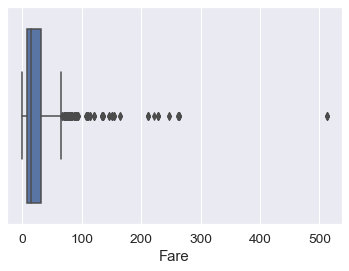

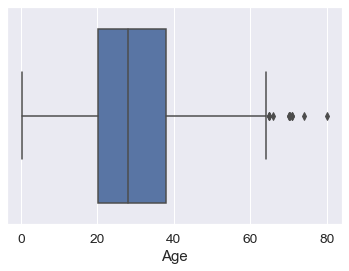

Null Statistics: **************************************************************************
COLUMN               NULL CNT             NULL RATE
PassengerId          0                    0.00%
Survived             0                    0.00%
Pclass               0                    0.00%
Name                 0                    0.00%
Sex                  0                    0.00%
Age                  177                  19.87%
SibSp                0                    0.00%
Parch                0                    0.00%
Ticket               0                    0.00%
Fare                 0                    0.00%
Cabin                687                  77.10%
Embarked             2                    0.22%
DATA HEAD : **************************************************************************
    Pclass  SibSp  Parch     Fare        Age  Sex_female  Sex_male  Embarked_C  \
3       1      1      0  53.1000  35.000000           1         0           0   
4       3      0      0   8.

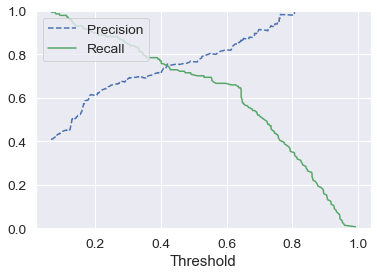

auc:  0.8760840874811464


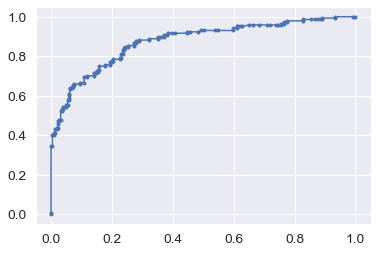

RF ---Model Evaluation Report:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
[[198  23]
 [ 35 109]]
precision:  0.8257575757575758
recall:  0.7569444444444444
f1-score:  0.7898550724637681


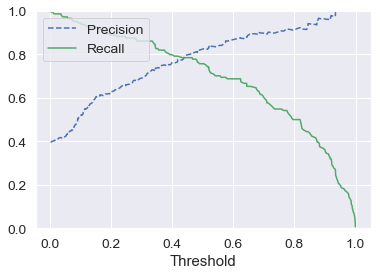

auc:  0.8865321769733535


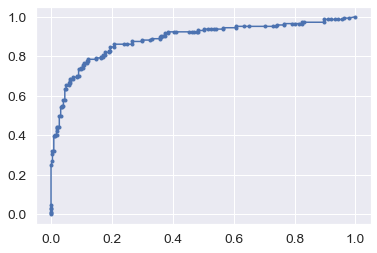

XGB ---Model Evaluation Report:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)
[[205  16]
 [ 45  99]]
precision:  0.8608695652173913
recall:  0.6875
f1-score:  0.7644787644787645


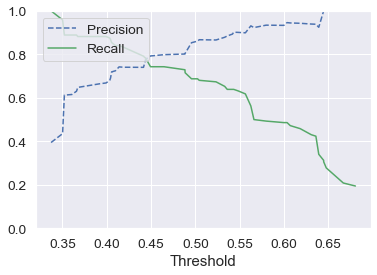

auc:  0.8764611613876321


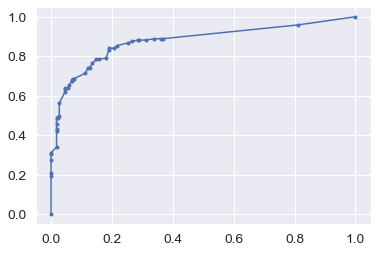

output/sub_RF_2020-02-19 21:18:55.629402.csv
Your submission output/sub_RF_2020-02-19 21:18:55.629402.csv was successfully saved!


In [292]:
# *************************        Phase0: packages & methods *****************************
import datetime
import random
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
# ML
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

# data analysis methods:
def info_print(header, content):
    print(header, ': **************************************************************************\n', content, '\n')
    
def value_counts(df):
    for fea in df.columns:
        print(df[fea].value_counts())
        
def facet_grid(df, label):
    for fea in df.columns:
        if fea != label :
            grid = sns.FacetGrid(df, col=label)
            grid.map(plt.hist, fea, bins=20)
            plt.show()
            
def box_report(df):
    for fea in df.columns:
        if fea != label :
            sns.boxplot(x = fea, data=df)
            plt.show()
    
def corr_heatmap(df, label, k):
    corr = train_data.corr()
    sns.heatmap(corr, vmax=.8, square=True)
    plt.show()
    print(round(corr, 2))
    cols = corr.nlargest(k, label)[label].index
    cm = np.corrcoef(df[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
    
def null_report(df):
    print('Null Statistics: **************************************************************************')
    print('COLUMN'.ljust(20), 'NULL CNT'.ljust(20), 'NULL RATE')
    for i in df.columns:
        d=len(df) - df[i].count()
        r=(d / len(df)) * 100
        rate='%.2f%%' % r
        print(str(i).ljust(20), str(d).ljust(20), rate)

# feature engineering methods:  
def tv_split(train_data, t_ratio):
    random.seed(23)
    train_data['rand'] = train_data[label].apply(lambda x: random.random())
    # T - training set, V - validation set
    train_data_T = train_data[train_data.rand <= t_ratio]
    train_data_V = train_data[train_data.rand > t_ratio]
    return train_data_T, train_data_V

def feature_engineering(df, label, features, features_np):
    y = ''
    if label in df.columns:
        y = df[label]
    X = pd.get_dummies(df[features])
    null_process2(X, features_np)
    return X, y
      
# def null_process(train_data, test_data, cols):
#     for col in cols:
#         train_data[col] = train_data[col].fillna(train_data[col].mean())
#         test_data[col] = test_data[col].fillna(train_data[col].mean())
        
def null_process2(df, cols):
    for col in cols:
        df[col] = df[col].fillna(df[col].mean())

# training methods:
def training_pipeline(X_train, y_train, model_map):
    for k in model_map.keys():
        model = model_map[k]
        model.fit(X_train, y_train)

        
# evaluation methods:
def evaluate_pipeline(X_valid, y_valid, model_map):
    for k in model_map.keys():
        model = model_map[k]
        print(k, "---Model Evaluation Report: ", model)
        evaluate(model, X_valid, y_valid)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.clf()
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.show()
    
def evaluate_binary_clf_prob(y_actual, y_prob):
    plt.clf()
    precisions, recalls, thresholds = precision_recall_curve(y_actual, y_prob)
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    fpr, tpr, _ = roc_curve(y_actual, y_prob)
    plt.plot(fpr, tpr, marker='.')
    auc = roc_auc_score(y_actual, y_prob)
    print('auc: ', auc)
    plt.show()

def evaluate_binary_clf_bin(y_actual, y_bin):
    plt.clf()
    print(confusion_matrix(y_actual, y_bin))
    print('precision: ', precision_score(y_actual, y_bin))
    print('recall: ', recall_score(y_actual, y_bin))
    print('f1-score: ', f1_score(y_actual, y_bin))
    
def evaluate(model, X, y):
    y_bin = model.predict(X)
    y_prob = model.predict_proba(X)[::,1]
    evaluate_binary_clf_bin(y, y_bin)
    evaluate_binary_clf_prob(y, y_prob)
        
### Phase 1: data visualization and analysis
train_data = pd.read_csv("input/train.csv")
info_print('DATA DESCRIBE', round(train_data.describe(), 2))
info_print('DATA HEAD', train_data.head(5))
label = 'Survived'
# possible feature extraction
all_cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare', 'Age']
discrete_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
continuous_feas = ['Fare', 'Age']

# value_counts(train_data)
box_report(train_data[continuous_feas])#todo: how to deal with outliers?
null_report(train_data)

#todo: how to analyse without modifying data
# facet_grid(train_data, label)
# corr_heatmap(train_data, label, 20)

# *************************        Phase2: feature engineering *****************************
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare', 'Age']

t_ratio = 0.6
train_data_T, train_data_V = tv_split(train_data, t_ratio)

X_train_T, y_train_T = feature_engineering(train_data_T, label, features, continuous_feas)
X_train_V, y_train_V = feature_engineering(train_data_V, label, features, continuous_feas)

test_data = pd.read_csv("input/test.csv")

X_test, y_test = feature_engineering(test_data, label, features, continuous_feas)

info_print('DATA HEAD', X_train_T.head(5))
info_print('DATA HEAD', X_train_V.head(5))
info_print('DATA HEAD', X_test.head(5))
# print(X_test.isnull().values.any())

# *************************        Phase3: model training & evaluating *****************************
model_map = {}
model_map['LR'] = LogisticRegression(solver="liblinear")
model_map['RF'] = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=1)
model_map['XGB'] = XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators = 50, 
                                 silent=True, objective='binary:logistic')

training_pipeline(X_train_T, y_train_T, model_map)
evaluate_pipeline(X_train_V, y_train_V, model_map)

best = 'RF'

y_test = model_map[best].predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_test})
output_filename = 'output/sub_' + best + '_' + str(datetime.datetime.now()) + '.csv'
print(output_filename)
output.to_csv(output_filename, index=False)
print('Your submission ' + output_filename + ' was successfully saved!')

In [263]:
## Grid search
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

clf = XGBClassifier(learning_rate=0.1, max_depth=5, silent=True, objective='binary:logistic')
param_test = {
    'n_estimators': range(30, 60, 2),
    'max_depth': range(2, 12, 1)
}
grid_search = GridSearchCV(estimator = clf, param_grid = param_test, scoring='f1', cv=5)
grid_search.fit(X_train_T, y_train_T)
grid_search.cv_results_
xgb_model = grid_search.best_estimator_
y_xgb_V = xgb_model.predict(X_train_V)
evaluate_binary_clf_bin(y_train_V, y_xgb_V)

[[201  20]
 [ 37 107]]
precision:  0.84251968503937
recall:  0.7430555555555556
f1-score:  0.7896678966789668


/Users/mtdp1/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


<Figure size 432x288 with 0 Axes>

In [268]:
# clf = XGBClassifier(learning_rate=0.1, max_depth=5, silent=True, objective='binary:logistic')
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=1)
param_test1 = {
    'n_estimators': range(50, 150, 10),
    'max_depth': range(5, 15, 1)
}
grid_search1 = GridSearchCV(estimator = rf, param_grid = param_test1, scoring='f1', cv=5)
grid_search1.fit(X_train_T, y_train_T)
grid_search1.cv_results_
rf_model = grid_search1.best_estimator_
y_rf_V = rf_model.predict(X_train_V)
evaluate_binary_clf_bin(y_train_V, y_rf_V)

[[189  32]
 [ 37 107]]
precision:  0.7697841726618705
recall:  0.7430555555555556
f1-score:  0.7561837455830389


/Users/mtdp1/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


<Figure size 432x288 with 0 Axes>